In [3]:
import pandas as pd

In [4]:
# Pandas의 Series 생성
series1 = pd.Series([1,2,3,4,5])
series1

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
# 인덱스 지정해서 Series 생성
series2 = pd.Series([1,2,3,4,5], index = ['일','이','삼','사','오'])
series2

일    1
이    2
삼    3
사    4
오    5
dtype: int64

In [6]:
population = pd.Series([9904312,3448737,2890451,2466052],
                       index = ['서울','부산','인천','대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [7]:
# Series 정보확인
# 값, 인덱스, 타입
# values, index, dtype
population.values # 값 확인

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [8]:
population.index # 인덱스 확인

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [9]:
population.dtype # 타입 확인

dtype('int64')

In [10]:
# Series의 컬럼 이름 지정
population.name = '인구'
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [11]:
population.index.name = '도시'
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [12]:
# 시리즈 연산
population / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [13]:
# 시리즈 인덱싱
population[1] # 인덱스 번호 사용

3448737

In [14]:
population['부산'] # 지정한 인덱스 사용

3448737

In [15]:
# 리스트를 활용한 인덱싱
population[['인천','서울','인천']]

도시
인천    2890451
서울    9904312
인천    2890451
Name: 인구, dtype: int64

In [16]:
population[[0,3,1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [17]:
# Boolean 인덱싱
# 인구수가 250만 이상인 도시의 정보 출력
population[population >= 2500000]

도시
서울    9904312
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [18]:
# 인구수가 500만 이하의 도시 정보 출력
population[population <= 5000000]

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [19]:
# 인구수가 250만 이상이고 500만 이하의 도시 정보 출력
population[(2500000 <= population) & (population <= 5000000)]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [20]:
# 슬라이싱
# 인덱스 번호로 슬라이싱[첫번째 수 : 끝 수 +1]
# 지정한 인덱스로 슬라이싱[첫번째 값 : 끝나는 값]
population['부산':'인천']

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [21]:
# 딕셔너리 객체로 Series 생성
# 인덱스 부여가 자동으로 완성
# key = 인덱스
# values = 값
data = {'서울':9631482,'부산':3393191,'인천':2632035,'대전' : 1490158}
population2 = pd.Series(data)
population2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [22]:
# population2 : 2010년 인구
# population : 2015년 인구
# 2015년도와 2010년도의 인구 증가를 계산
# 같은 인덱스의 값을 가지고 있는 것들끼리 계산
ds = population - population2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [23]:
print(population.index)
print(population2.index)

Index(['서울', '부산', '인천', '대구'], dtype='object', name='도시')
Index(['서울', '부산', '인천', '대전'], dtype='object')


In [24]:
# notnull() : null이 아니면 True, null이면 False
# isnull() : null이 아니면 False, null이면 True

In [25]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [26]:
ds[ds.isnull()]

대구   NaN
대전   NaN
dtype: float64

In [27]:
# 2015년도와 2010년도의 인구 증가율 계산
# 단, 없는값은 출력 X
# (2015년 인구 - 2010년 인구) / 2010년 인구 *100
rs = ds/ population2*100
rs[rs.notnull()]

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [81]:
# Series값 갱신 추가 삭제
# 대구 값 갱신
rs['대구'] = 1,41

ValueError: setting an array element with a sequence.

In [ ]:
rs

In [ ]:
# 값 추기
rs['광주'] = 2.08
rs

In [ ]:
del rs['대전']
rs

### DataFrame

In [30]:
# 딕셔너리를 통해서 DataFrame만들기
data = {
    "2015" : [9904312,3448737,2890451,2466052],
    "2010" : [9631482,3393191,2632035,2431774]
}

df = pd.DataFrame(data)
df

,2015,2010
0,9904312,9631482
1,3448737,3393191
2,2890451,2632035
3,2466052,2431774


In [32]:
# DataFrame 생성 후 index 설정
df.index = ['서울','부산','인천','대구']
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [37]:
# DataFrame 생성 시 index 지정, column 지정
data = [
    [9904312,3448737,2890451,2466052],
    [9631482,3393191,2632035,2431774]
]

ind = ['2015','2010']
col = ['서울','부산','인천','대구']

df2 = pd.DataFrame(data, index = ind, columns = col)
df2

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


In [49]:
data = [
    [9904312,9631482],
    [3448737,3393191],
    [2890451,2632035],
    [2466052,2431774]
]

ind =  ['서울','부산','인천','대구']
col = ['2015','2010']

df2 = pd.DataFrame(data, index = ind, columns = col)
df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


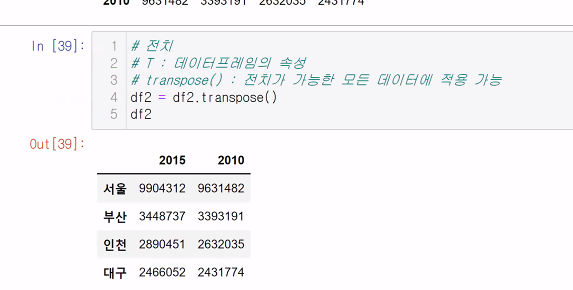

In [ ]:
# 데이터 프레임 정보 확인
# 값 확인 : values
# 인덱스 확인 : index
# 컬럼 확인 : columns

In [42]:
df2.values

array([[9904312, 3448737, 2890451, 2466052],
       [9631482, 3393191, 2632035, 2431774]], dtype=int64)

In [50]:
df2.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [51]:
df2.columns

Index(['2015', '2010'], dtype='object')

In [54]:
# 데이터 프레임에 값 추가
# 컬럼을 기준으로 값 추가
# 기존에 가지고 있는 컬럼을 입력시 값의 수정이 이루어짐
df2['2005'] = [9762546,3512547,2517680,2450000]
df2

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2450000


In [57]:
# 인덱싱 슬라이싱
# 컬럼으로 인덱싱하기
df2["2010"] # 하나의 컬럼 출력 시 Series로 출력

서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [58]:
#리스트를 사용한 인덱싱
# 데이터 프레임으로 출력
df2[["2010"]]

,2010
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [62]:
# 인덱스를 기준으로 하는 슬라이싱 숫자 컬럼명 상관없음
# 컬럼을 기준으로 하는 인덱싱은 숫자X, 컬럼명을 기준으로
# df2[0:2]
df2[["2015" : "2010"]]

SyntaxError: invalid syntax (Temp/ipykernel_19768/228467929.py, line 4)

In [60]:
df2['서울':'인천']

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680


In [ ]:
# 인덱서
#iloc : 인덱스 번호 사용
# loc : 지정한 인덱스 사용

In [73]:
# loc[ index, columns ]
df2.loc["서울":"부산" , '2015':'2010']

,2015,2010
서울,9904312,9631482
부산,3448737,3393191


In [77]:
df2.iloc[0:2, 0:2]

,2015,2010
서울,9904312,9631482
부산,3448737,3393191


In [79]:
# 데이터 프레임 Boolean인덱싱
# 2010년 인구가 250만 이상인 데이터 출력
bol = df2.loc[:,'2010'] >= 2500000
bol

서울     True
부산     True
인천     True
대구    False
Name: 2010, dtype: bool

In [80]:
df2.loc[bol, :]

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680


In [84]:
# read_csv()
pn = pd.read_csv('population_number.csv', encoding='euc-kr', index_col = '도시')
pn

,지역,2015,2010,2005,2000
도시,,,,,
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [87]:
# 값의 갯수 세기
# value_counts
pn.loc[:,'지역'].value_counts()

수도권    2
경상권    2
Name: 지역, dtype: int64

In [ ]:
# 정렬